In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

In [384]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [386]:
df=sns.load_dataset('titanic')

In [388]:
df.sample(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
690,1,1,male,31.0,1,0,57.0000,S,First,man,True,B,Southampton,yes,False
157,0,3,male,30.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
239,0,2,male,33.0,0,0,12.2750,S,Second,man,True,NaN,Southampton,no,True
629,0,3,male,NaN,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True
848,0,2,male,28.0,0,1,33.0000,S,Second,man,True,NaN,Southampton,no,False
613,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
397,0,2,male,46.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
168,0,1,male,NaN,0,0,25.9250,S,First,man,True,NaN,Southampton,no,True
439,0,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True


first remove duplicated col and  merging simmilar cols
for ex: alive and alone are duplicatem & sibsp and parch are same so merge it & who col pays no value
embark_town and embark are also same

In [391]:
df=df.drop(['alive','alone','who','embarked','deck'],axis=1)

In [393]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,First,True,Cherbourg


In [395]:
df['familysize']=df['sibsp']+df['parch']

In [397]:
df.drop(['sibsp','parch'],axis=1,inplace=True)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   adult_male   891 non-null    bool    
 7   embark_town  889 non-null    object  
 8   familysize   891 non-null    int64   
dtypes: bool(1), category(1), float64(2), int64(3), object(2)
memory usage: 50.7+ KB


In [401]:
df.describe()

,survived,pclass,age,fare,familysize
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.904602
std,0.486592,0.836071,14.526497,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [403]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
class            0
adult_male       0
embark_town      2
familysize       0
dtype: int64

need to add values in place of null remove null values

In [406]:
df['age'].median()

28.0

In [408]:
df[df['age'].isnull()]

,survived,pclass,sex,age,fare,class,adult_male,embark_town,familysize
5,0,3,male,NaN,8.4583,Third,True,Queenstown,0
17,1,2,male,NaN,13.0000,Second,True,Southampton,0
19,1,3,female,NaN,7.2250,Third,False,Cherbourg,0
26,0,3,male,NaN,7.2250,Third,True,Cherbourg,0
28,1,3,female,NaN,7.8792,Third,False,Queenstown,0
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,Third,True,Cherbourg,0
863,0,3,female,NaN,69.5500,Third,False,Southampton,10
868,0,3,male,NaN,9.5000,Third,True,Southampton,0
878,0,3,male,NaN,7.8958,Third,True,Southampton,0


In [410]:
# Fill missing ages with median age based on 'pclass' and 'sex'



In [412]:
df['age'] = df.groupby(['pclass', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))



In [422]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,fare,class,adult_male,embark_town,familysize


In [414]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [416]:
df['embark_town'].isnull().sum()


0

In [418]:
df['age'].isnull().sum()

0

In [218]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

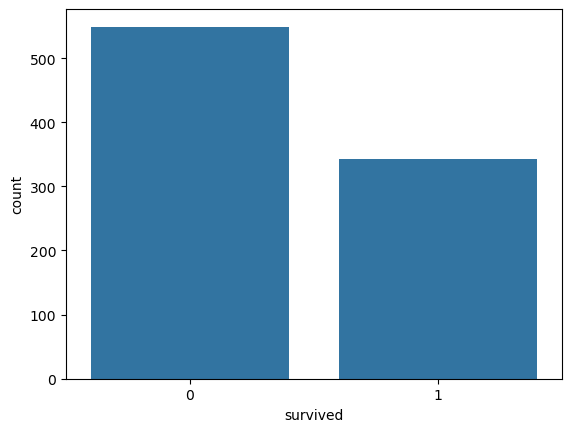

In [214]:
sns.countplot(x='survived', data=df)

In [268]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

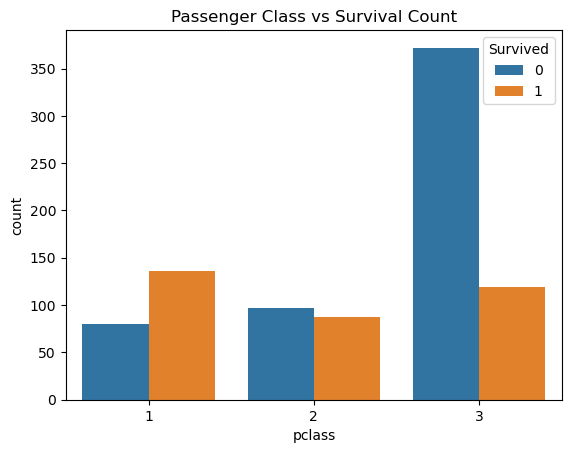

In [250]:
sns.countplot(x='pclass',data=df,hue='survived')
# sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Passenger Class vs Survival Count")
# plt.xlabel("Passenger Class")
# plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


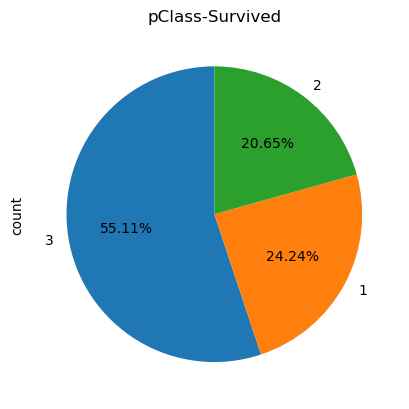

In [306]:
pclass_counts = df['pclass'].value_counts()

# Plot as pie
pclass_counts.plot(kind='pie', autopct='%.2f%%', startangle=90, labels=pclass_counts.index)
plt.title('pClass-Survived')
plt.show()

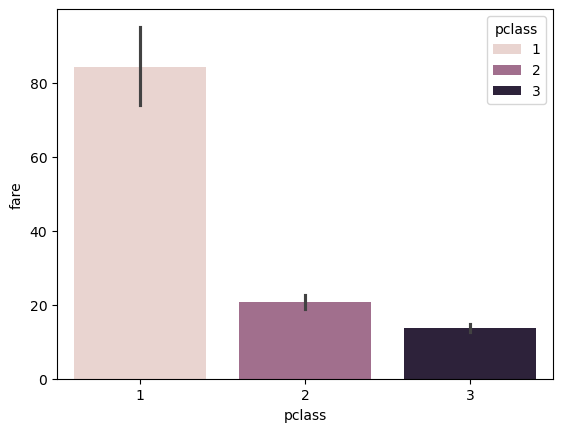

In [440]:
sns.barplot(y='fare',x='pclass',data=df,hue='pclass')
plt.show()

In [520]:
df['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='pclass', ylabel='survived'>

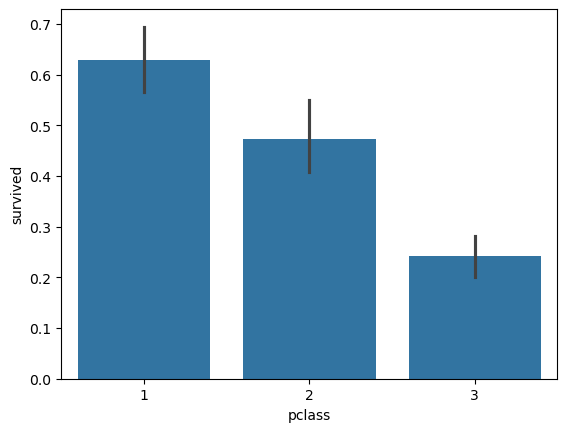

In [550]:
sns.barplot(x='pclass',y='survived' ,data=df)

<Axes: xlabel='embark_town', ylabel='survived'>

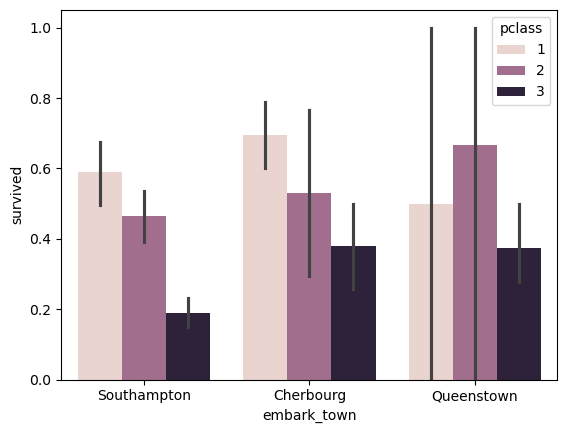

In [554]:
sns.barplot(x='embark_town',y='survived',data=df,hue='pclass')

<Axes: xlabel='embark_town', ylabel='count'>

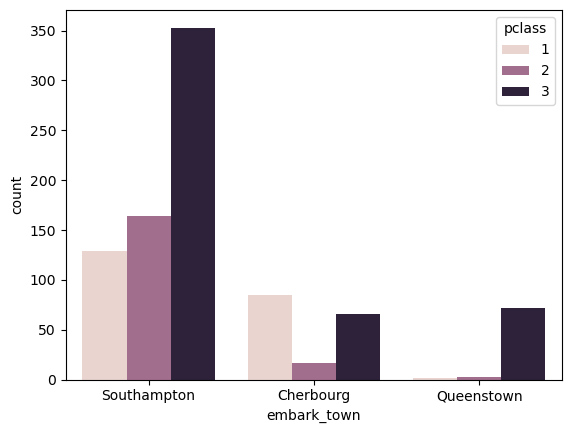

In [560]:
sns.countplot(x='embark_town',data=df,hue='pclass')

<Axes: xlabel='embark_town', ylabel='count'>

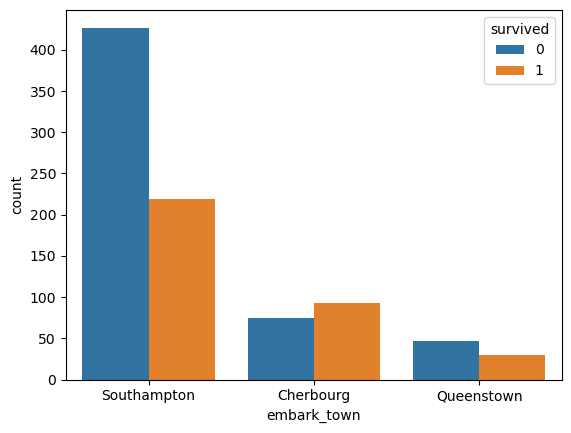

In [562]:
sns.countplot(x='embark_town',data=df,hue='survived')

<Axes: xlabel='sex', ylabel='survived'>

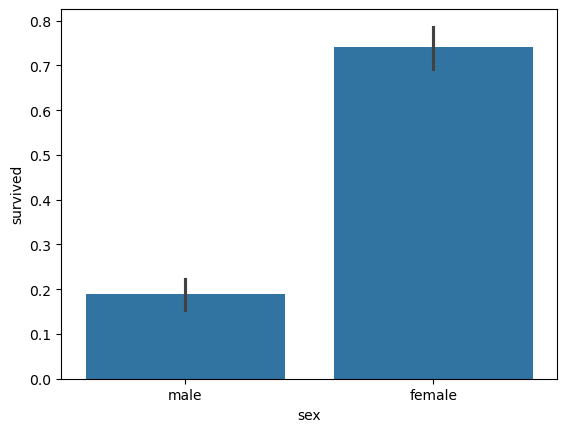

In [580]:
sns.barplot(x='sex',y='survived',data=df,)

<Axes: xlabel='sex', ylabel='age'>

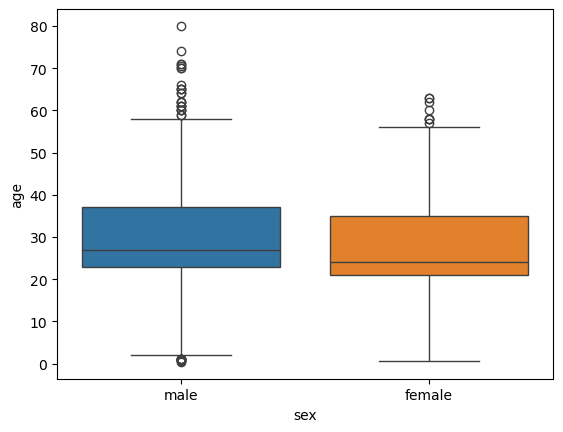

In [518]:
sns.boxplot(y='age',x='sex',data=df,hue='sex')

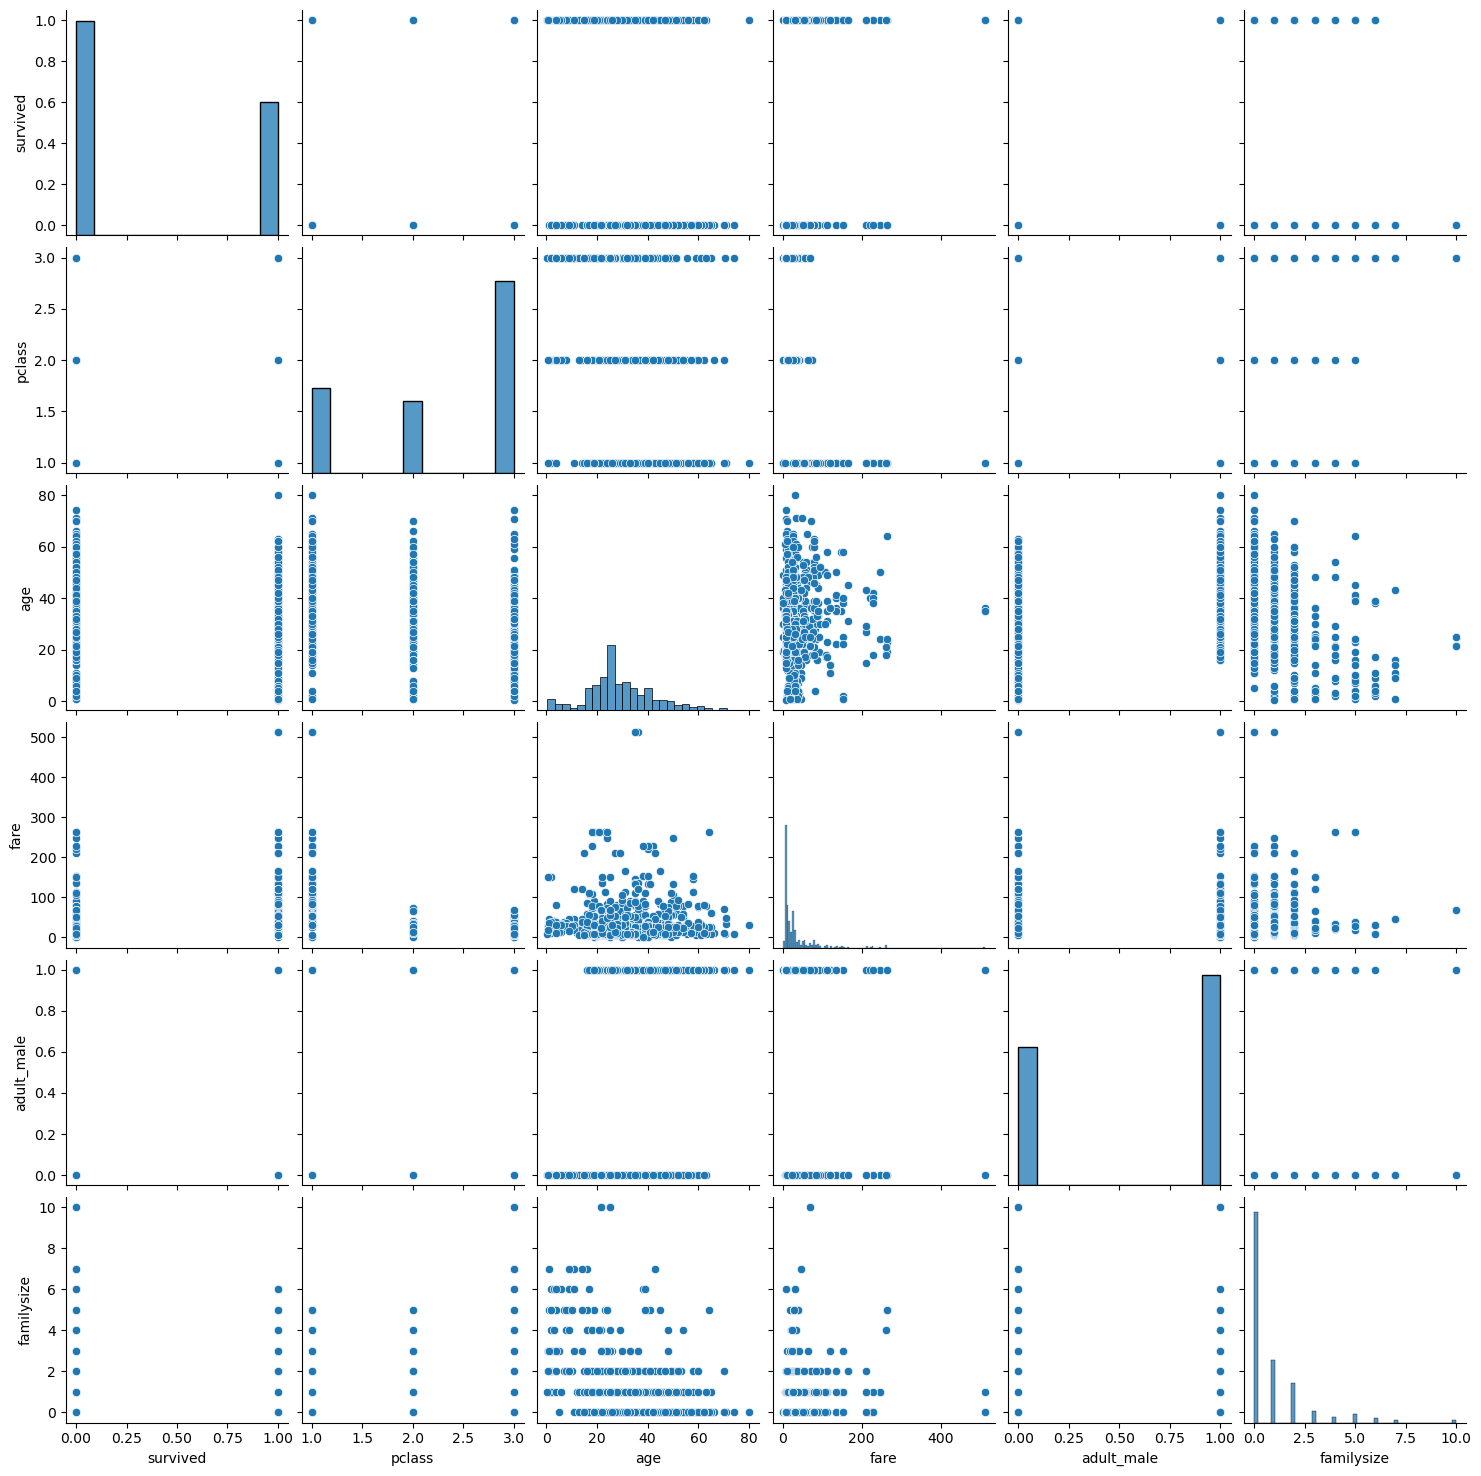

In [466]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='sex', ylabel='age'>

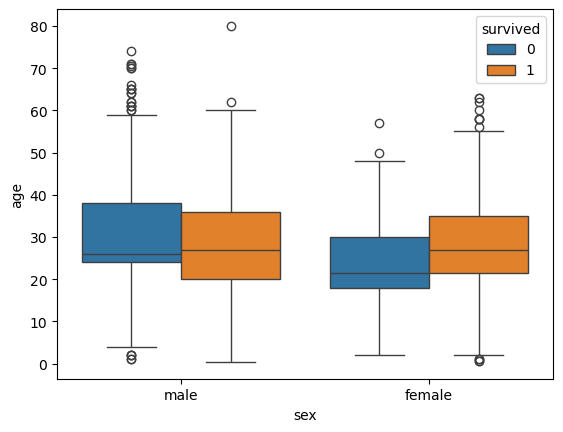

In [468]:
sns.boxplot(y='age',x='sex',data=df,hue='survived')

<Axes: xlabel='familysize', ylabel='age'>

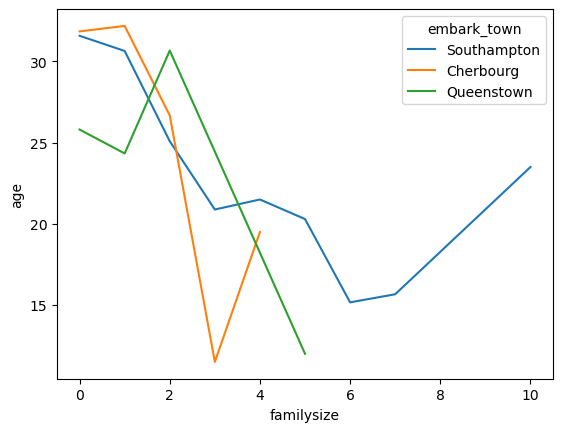

In [516]:
sns.lineplot(x="familysize",y="age",hue='embark_town',data=df,errorbar=None)

In [590]:
cor=df.corr(numeric_only=True)
cor

,survived,pclass,age,fare,adult_male,familysize
survived,1.000000,-0.338481,-0.059579,0.257307,-0.557080,0.016639
pclass,-0.338481,1.000000,-0.413583,-0.549500,0.094035,0.065997
age,-0.059579,-0.413583,1.000000,0.122692,0.263411,-0.258456
fare,0.257307,-0.549500,0.122692,1.000000,-0.182024,0.217138
adult_male,-0.557080,0.094035,0.263411,-0.182024,1.000000,-0.348143
familysize,0.016639,0.065997,-0.258456,0.217138,-0.348143,1.000000


<Axes: >

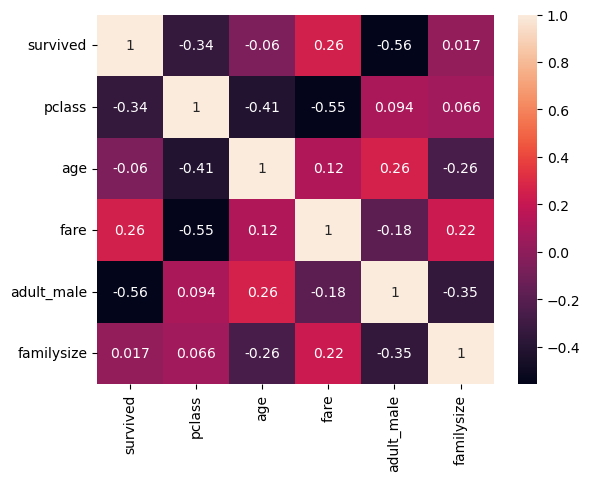

In [594]:
sns.heatmap(cor,annot=True)

# Model Creation

In [610]:
df.head(5)

,survived,pclass,sex,age,fare,class,adult_male,embark_town,familysize
0,0,3,male,22.0,7.2500,Third,True,Southampton,1
1,1,1,female,38.0,71.2833,First,False,Cherbourg,1
2,1,3,female,26.0,7.9250,Third,False,Southampton,0
3,1,1,female,35.0,53.1000,First,False,Southampton,1
4,0,3,male,35.0,8.0500,Third,True,Southampton,0


In [681]:
# X=df[['pclass','sex'	,'age'	,'fare'	,'class'	,'adult_male',	'embark_town','familysize']]
X=df[['pclass'	,'age'		,'familysize']]
y=df['survived']

In [683]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [685]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [687]:
X_train

,pclass,age,familysize
298,1,40.00,0
884,3,25.00,0
247,2,24.00,2
478,3,22.00,0
305,1,0.92,3
...,...,...,...
106,3,21.00,0
270,1,40.00,0
860,3,41.00,2
435,1,14.00,3


In [689]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [691]:
y_predict=LR.predict(X_test)

In [693]:
y_predict

array([ 0.24082544,  0.44903043,  0.29846515,  0.65392713,  0.34188496,
        0.73557624,  0.28571698,  0.31731449,  0.33246029,  0.77992194,
        0.63451673,  0.09449434,  0.25542539,  0.21347731,  0.40653651,
        0.81299119,  0.59202281,  0.28571698,  0.48302556,  0.55710179,
        0.26447002,  0.66758597,  0.29939104,  0.29846515,  0.25597123,
        0.34558851,  0.61659327,  0.44903043,  0.39658121,  0.20497853,
        0.30696394,  0.28146758,  0.61659327,  0.28571698,  0.31546272,
        0.23140077,  0.71857868,  0.28571698,  0.70158111,  0.25597123,
        0.51887247,  0.2144032 ,  0.25597123,  0.25597123,  0.07842266,
        0.3021687 ,  0.30696394,  0.2729688 ,  0.26447002,  0.44846937,
        0.40322822,  0.49946207,  0.090625  ,  0.84033931, -0.08398012,
        0.78842072,  0.44053164,  0.52403254,  0.41503529,  0.30696394,
        0.28996637,  0.59443564,  0.46695388,  0.61659327,  0.25597123,
        0.22806205,  0.53401827,  0.2219761 ,  0.30881571,  0.50

In [695]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: survived, Length: 223, dtype: int64

In [699]:
LR.predict([[1,34,0]])

E:\newanaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.66758597])

In [701]:
aa=y_test

In [703]:
aa.count()

223

# Model Evouation

In [706]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)
# from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# r2score=r2_score(y_test,y_predict)

In [715]:
r2score

0.2109391869629451

In [723]:
X_test.shape

(223, 3)

In [735]:
import math
mean_squared_error(y_test,y_predict)

0.18923242486838487

In [739]:
math.sqrt(mean_squared_error(y_test,y_predict))

0.4350085342477603

In [741]:
mean_absolute_error(y_test,y_predict)

0.3922450969832527